In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [18]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [19]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [20]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [23]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]

In [24]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [25]:
dependent=dataset['charges']

In [26]:
dependent

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
   independent,
    dependent,
    test_size=0.30,
    random_state=0
)

In [29]:
X_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,False,False
196,39,32.800,0,False,False
438,52,46.750,5,False,False
183,44,26.410,0,False,False
1298,33,27.455,2,True,False
...,...,...,...,...,...
763,27,26.030,0,True,False
835,42,35.970,2,True,False
1216,40,25.080,0,True,False
559,19,35.530,0,True,False


In [30]:
Y_train

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 936, dtype: float64

In [110]:

##from sklearn.tree import DecisionTreeRegressor

#regressor = DecisionTreeRegressor(criterion="squared_error", #{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
 #   splitter="random", #{“best”, “random”}, default=”best”
#    max_features="sqrt") #max_featuresint, float or {“sqrt”, “log2”}, default=None

#n_estimators=100, *, criterion='squared_error',  random_state=None

from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(n_estimators=100,criterion="friedman_mse",random_state= 0 )
regressor = RandomForestRegressor(n_estimators=100,criterion="friedman_mse",random_state=42)

regressor.fit(X_train, Y_train)


RandomForestRegressor(criterion='friedman_mse', random_state=42)

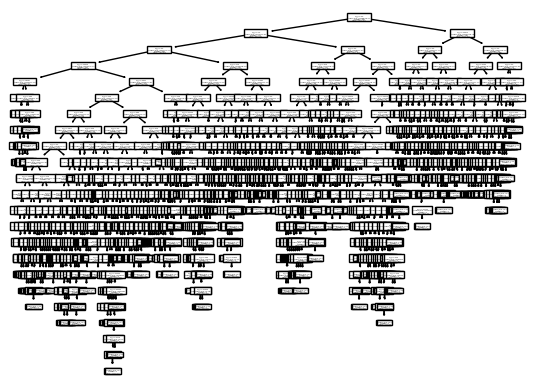

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [111]:
y_pred=regressor.predict(X_test)

In [112]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,y_pred)

In [113]:
r_score

0.8535239739623208

In [114]:
import pickle

filename = "finalized_model_RandomForest.sav"

# Open file in write-binary mode and dump model
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)


In [116]:
loaded_model=pickle.load(open("finalized_model_RandomForest.sav",'rb'))

In [117]:
# Predict Insurance charges age', 'bmi', 'children','sex_male', 'smoker_yes'
new_charge = [[40, 67, 1, True, False]]  # R&D, Admin, Marketing, State_Florida, State_New York
predicted_charge = loaded_model.predict(new_charge)
print("Predicted Profit:", predicted_charge[0])

Predicted Profit: 11444.2984474


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [119]:
# Convert booleans to integers
new_input = [[40, 67, 1, 1, 0]]  # sex_male=1, smoker_yes=0

# Predict
predicted_charge = loaded_model.predict(new_input)
print("Predicted Charge:", predicted_charge[0])


Predicted Charge: 11444.2984474


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [125]:
import pandas as pd

new_input = pd.DataFrame(
    [[40, 67, 1, 1, 0]],   # sex_male=1, smoker_yes=0
    columns=['age', 'bmi', 'children', 'sex_male', 'smoker_yes']
)

predicted_charge = loaded_model.predict(new_input)
result = loaded_model.predict(new_input)
print("Predicted Charge:", predicted_charge[0])


Predicted Charge: 11444.2984474


In [126]:
result

array([11444.2984474])